In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
def get_performance_df(filename: str, groupby: bool = False):
    df = pd.read_csv(filename)
    model_ordering = ['tiny', 'base', 'small', 'medium', 'large']
    df['model'] = pd.Categorical(df['model'], categories=model_ordering, ordered=True)
    if groupby:
        df = df.groupby(['category', 'model'], as_index=False)[['time_elapsed']].mean()
    return df

cpu = get_performance_df(filename='analysis-data/memory_results_cpu.csv')
gpu = get_performance_df(filename='analysis-data/memory_results_gpu.csv')

In [3]:
df = pd.merge(cpu, gpu, on=['video', 'category', 'model'], how='outer', suffixes=['_cpu', '_gpu'])
df = df[['model', 'category', 'video', 'gpu_memory', 'time_elapsed_gpu', 'time_elapsed_cpu']]
df = df.sort_values(['model', 'category', 'video'])
df = df.reset_index(drop=True)

In [4]:
markdown_table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)
print(markdown_table)

| model   |   category | video             |   gpu_memory |   time_elapsed_gpu |   time_elapsed_cpu |
|:--------|-----------:|:------------------|-------------:|-------------------:|-------------------:|
| tiny    |          1 | audios/video1.mp3 |     0.43398  |            2.25258 |            6.40608 |
| tiny    |          1 | audios/video2.mp3 |     0.431975 |            2.3984  |            6.18472 |
| tiny    |          2 | audios/video3.mp3 |     0.431043 |            9.68161 |           30.3908  |
| tiny    |          2 | audios/video4.mp3 |     0.43398  |           12.0237  |           32.9249  |
| tiny    |          3 | audios/video5.mp3 |     0.43398  |           49.8613  |          111.891   |
| tiny    |          3 | audios/video6.mp3 |     0.43398  |           50.8886  |          140.509   |
| base    |          1 | audios/video1.mp3 |     0.460075 |            1.28745 |            5.30696 |
| base    |          1 | audios/video2.mp3 |     0.460075 |            2.9707  |  

In [5]:
gb = df.groupby(['category', 'model'], as_index=False)[['gpu_memory', 'time_elapsed_gpu', 'time_elapsed_cpu']].mean()
gb

/tmp/ipykernel_28108/3171486599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = df.groupby(['category', 'model'], as_index=False)[['gpu_memory', 'time_elapsed_gpu', 'time_elapsed_cpu']].mean()


,category,model,gpu_memory,time_elapsed_gpu,time_elapsed_cpu
0,1,tiny,0.432977,2.325489,6.295401
1,1,base,0.460075,2.129071,7.046469
2,1,small,1.377127,3.719416,18.661625
3,1,medium,4.278138,6.880477,54.669120
4,1,large,8.760594,11.004152,97.905625
5,2,tiny,0.432511,10.852653,31.657821
6,2,base,0.461001,11.644772,38.891677
7,2,small,1.377127,23.127473,118.709327
8,2,medium,4.278138,36.792413,297.600917
9,2,large,8.760594,73.986643,574.302041


/tmp/ipykernel_28108/400862854.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in gb.groupby('model'):
/tmp/ipykernel_28108/400862854.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in gb.groupby('model'):


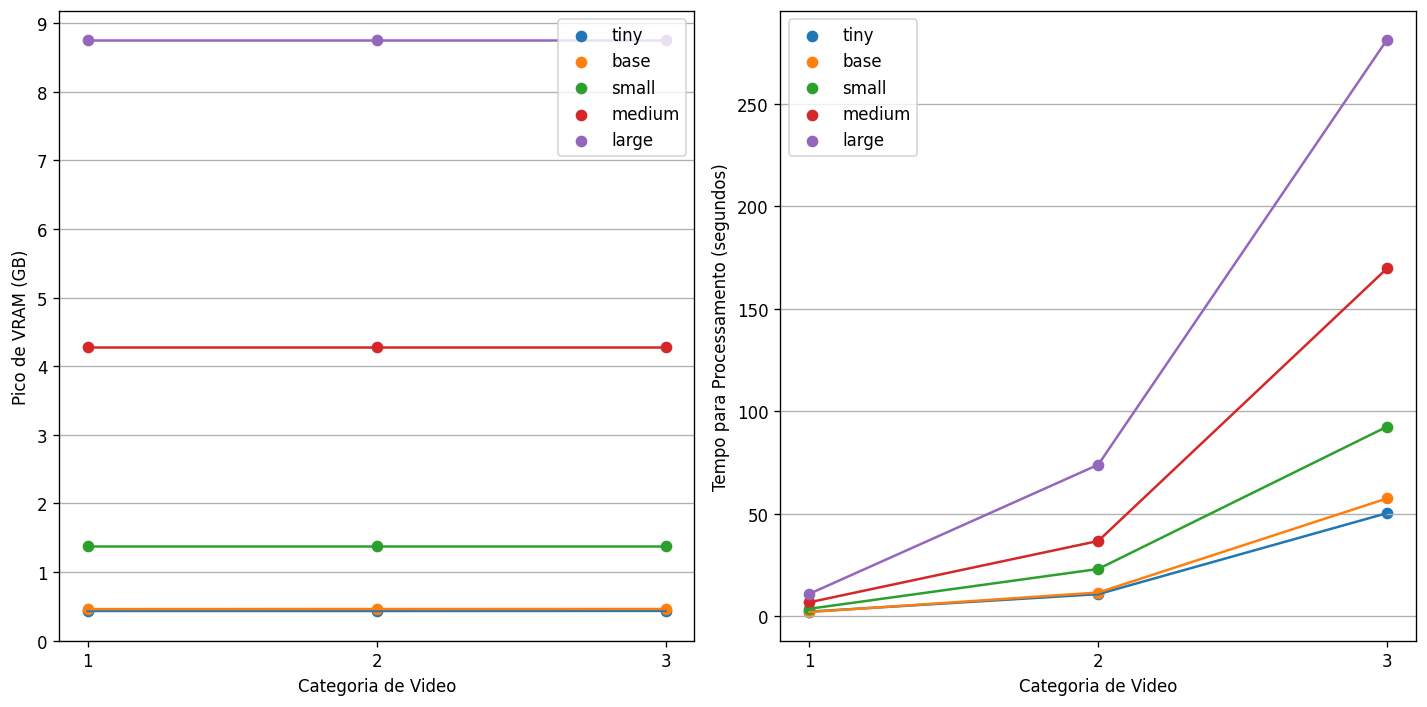

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=120)

for group_name, group_df in gb.groupby('model'):
    axs[0].plot(group_df['category'], group_df['gpu_memory']) 
    axs[0].scatter(group_df['category'], group_df['gpu_memory'], label=group_name) 
    axs[0].set_ylabel("Pico de VRAM (GB)")
    axs[0].set_xlabel("Categoria de Video")
    axs[0].set_yticks(np.arange(0, 10, 1))
    axs[0].set_xticks([1, 2, 3])
    axs[0].grid(axis='y')
    axs[0].legend()
    
for group_name, group_df in gb.groupby('model'):
    axs[1].plot(group_df['category'], group_df['time_elapsed_gpu']) 
    axs[1].scatter(group_df['category'], group_df['time_elapsed_gpu'], label=group_name) 
    axs[1].set_ylabel("Tempo para Processamento (segundos)")
    axs[1].set_xlabel("Categoria de Video")
    axs[1].grid(axis='y')
    axs[1].set_xticks([1, 2, 3])
    axs[1].legend()
    
fig.tight_layout()